# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

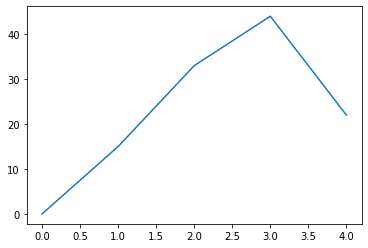

In [14]:
plt.plot([0,1,2,3,4], [0, 15, 33, 44, 22])

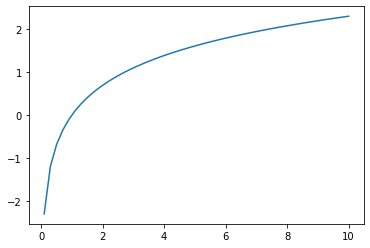

In [15]:
xs = np.linspace(0.1, 10)
ys = np.log(xs)
plt.plot(xs,ys)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


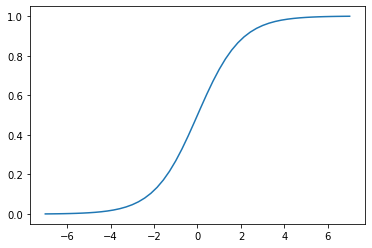

In [16]:
xs = np.linspace(-7,7)
ys = np.exp(xs)/(1+np.exp(xs))
plt.plot(xs, ys)

### Scatter plots

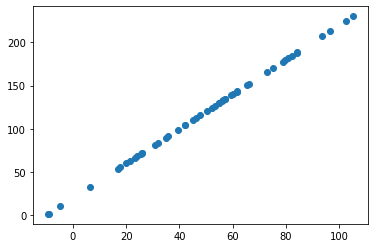

In [17]:
xs = np.random.randn(50)*30 + 50
ys = 2*xs + 20
plt.scatter(xs, ys)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


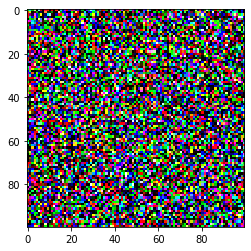

In [18]:
plt.imshow(np.random.randn(100,100,3))

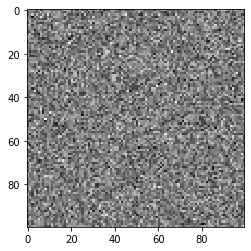

In [19]:
plt.imshow(np.random.randn(100,100), cmap='gray')

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


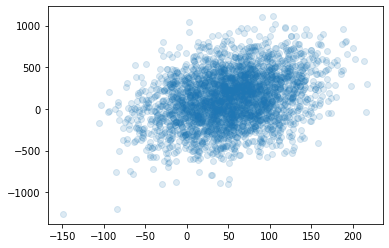

In [20]:
xs = np.random.randn(3000)*50 +50
ys = 2*xs +20 +np.random.randn(3000)*300
plt.scatter(xs, ys, alpha=.15)

This is what happens if you make a line plot of unsorted data:

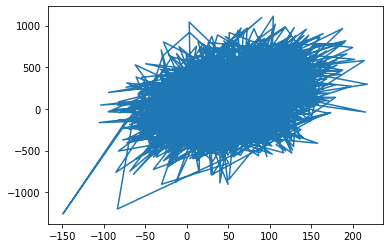

In [21]:
plt.plot(xs,ys)

In [22]:
xs

array([44.7498519 , 20.28747283, 83.78900667, ..., 23.23343047,
       86.48920796, 40.44680798])

### Bar plots

Do not confuse with histograms

([<matplotlib.axis.XTick at 0x7fe1acdaf490>,
 <a list of 3 Text xticklabel objects>)

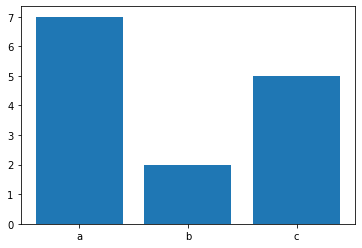

In [23]:
plt.bar(range(3), [7,2,5])
plt.xticks(range(3), ['a', 'b', 'c'])

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

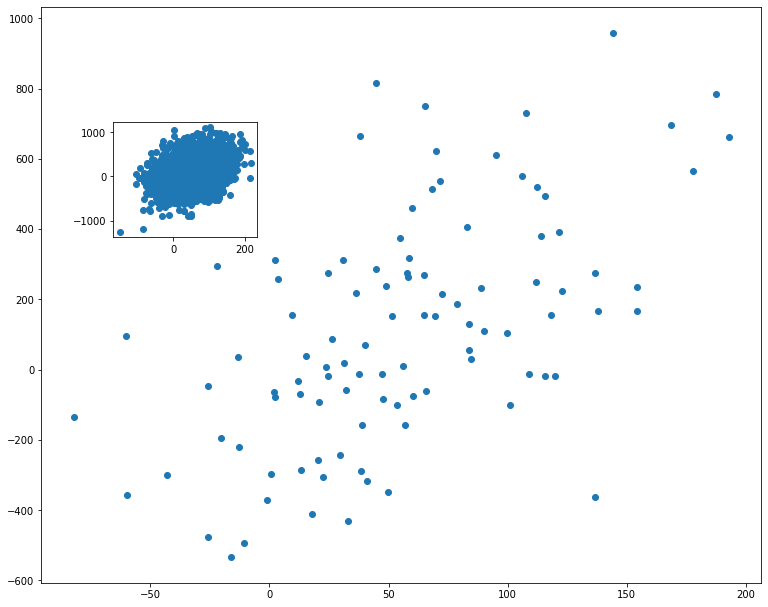

In [24]:
f = plt.figure(figsize=(10,8))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([0.10,0.6,0.2,0.2])

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

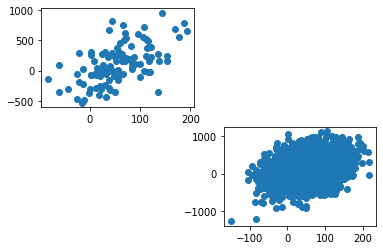

In [25]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(2,2,1)
axes2 = f.add_subplot(2,2,4)

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

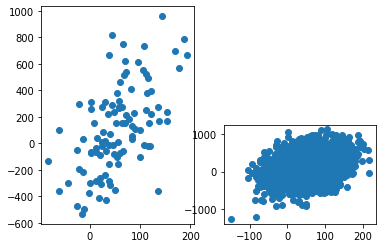

In [26]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(1, 2,1)
axes2 = f.add_subplot(2,2,4)

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

### `plt.subplots()`

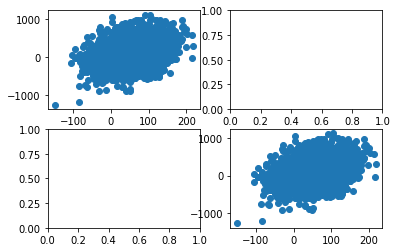

In [27]:
f, ax = plt.subplots(2,2)
ax[0,0].scatter(xs,ys)
ax[1,1].scatter(xs,ys)

### Sharing axis

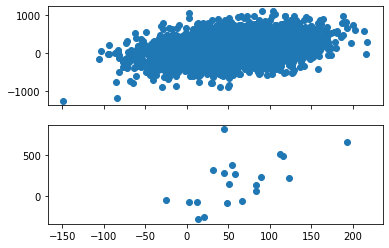

In [28]:
f, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(xs,ys)
ax[1].scatter(xs[:20],ys[:20])

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

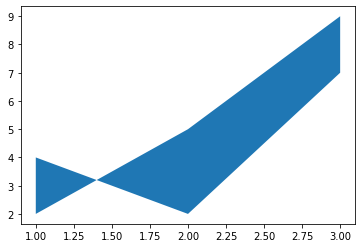

In [29]:
plt.fill_between([1,2,3], [4,2,7], [2,5,9])

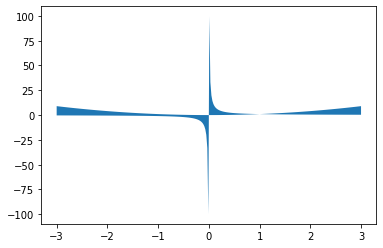

In [30]:
xs = np.linspace(-3, 3, 300)

plt.fill_between(xs, xs ** 2, 1 / xs)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



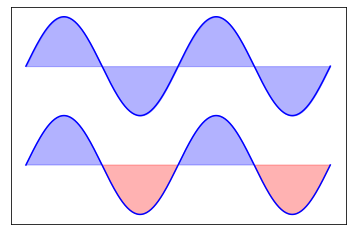

In [31]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, Y+1, 1, alpha=.3, color='blue')
plt.fill_between(X, Y-1, -1, alpha=.3, color='blue', where=Y-1 > -1)
plt.fill_between(X, Y-1, -1, alpha=.3, color='red', where=Y-1 < -1)
plt.xticks([])
plt.yticks([])
plt.savefig('sine_exercise.png')

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

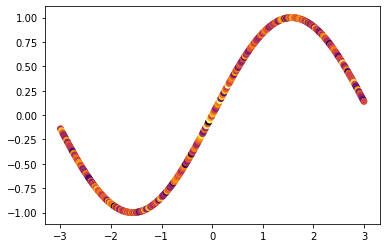

In [35]:
from matplotlib import cm

cmap = cm.get_cmap('inferno')
plt.scatter(xs, np.sin(xs), c=np.random.randn(len(xs)), cmap=cmap)

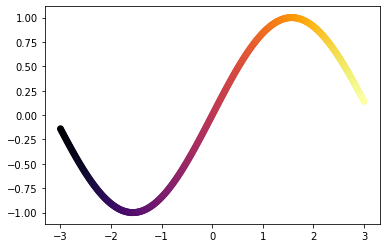

In [36]:
plt.scatter(xs, np.sin(xs), c=xs, cmap=cmap)
# c es la codificación del color

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

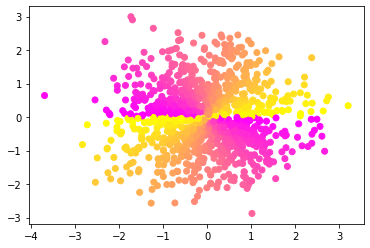

In [87]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
cmap = cm.get_cmap('spring')

#codificando el color como la arcotangente de x/y conseguimos que el gradiente de colores varía de forma circular según la imagen
plt.scatter(X,Y, c=np.arctan(X/Y), cmap=cmap)
plt.show()

### Markers and linestyles

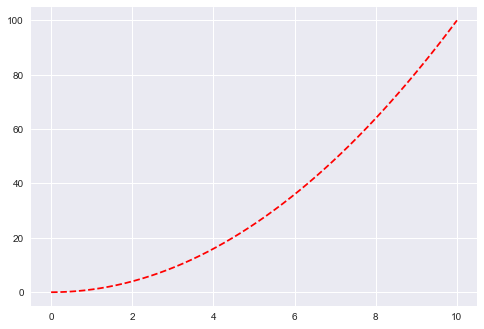

In [125]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')

#sintaxis de los markers: r es rojo, -- es linea discontinua

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

(array([ 2.,  3.,  3.,  5.,  7., 15., 21., 28., 32., 45., 59., 83., 95.,
        95., 82., 79., 91., 57., 55., 52., 31., 25., 19., 17.,  9.,  7.,
         4.,  1.,  1.,  1.]),
 array([-3.0490859 , -2.83866766, -2.62824942, -2.41783117, -2.20741293,
        -1.99699469, -1.78657645, -1.57615821, -1.36573997, -1.15532172,
        -0.94490348, -0.73448524, -0.524067  , -0.31364876, -0.10323051,
         0.10718773,  0.31760597,  0.52802421,  0.73844245,  0.94886069,
         1.15927894,  1.36969718,  1.58011542,  1.79053366,  2.0009519 ,
         2.21137014,  2.42178839,  2.63220663,  2.84262487,  3.05304311,
         3.26346135]),
 <a list of 30 Patch objects>)

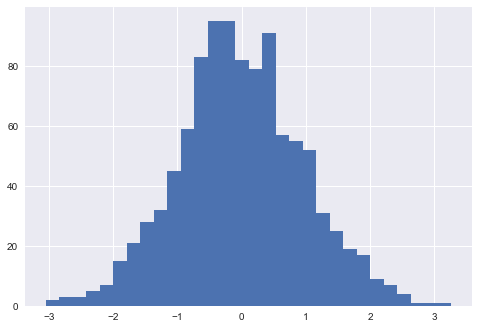

In [128]:
plt.hist(X, bins=30)

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

$$\mu = \frac{\sum_{i=1}^nx_i}{n}$$

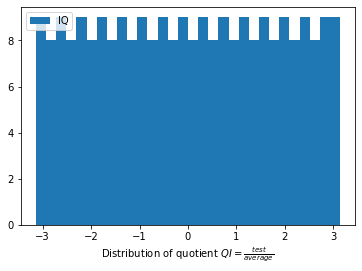

In [37]:
plt.hist(X, bins=30, label='IQ')
#en las leyendas podemos meter código latex para escribir ecuaciones matemáticas
plt.xlabel(r'Distribution of quotient $QI=\frac{test}{average}$')
plt.legend()

## Ticks, tick labels, limits

### Ticks

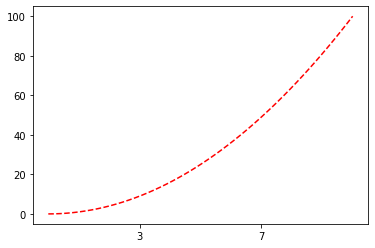

In [89]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);

### Tick labels

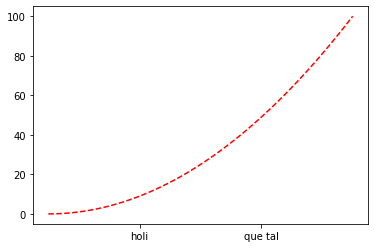

In [90]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);

### Limits

(20, 60)

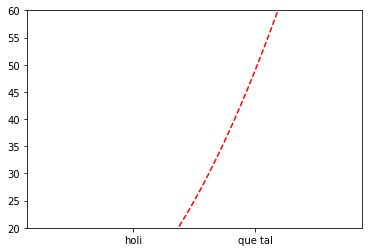

In [91]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);
ax.set_ylim(20, 60)

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial




#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

short_column_names = ['local_prices', 'bathrooms', 'site_area',
'living_area', 'garages', 'rooms',
'bedrooms', 'age', 'construction_type',
'architecture', 'fireplaces', 'price']

In [38]:
short_column_names = ['local_prices', 'bathrooms', 'site_area',
'living_area', 'garages', 'rooms',
'bedrooms', 'age', 'construction_type',
'architecture', 'fireplaces', 'price']

In [39]:
import pandas as pd
import seaborn as sns

#seaborn es una libreía de visualización de datos estadísticos,
#que no compite con matplotlib, son diferentes, de hecho utiliza matplotlib

In [42]:
df = pd.read_csv('houses.csv')
df.head()

,index,the local selling prices in hundreds of dollars,the number of bathrooms,the area of the site in thousands of square feet,the size of the living space (1000 square feet),number of garages,number of rooms,the number of bedrooms,the age in years,construction type,architecture type,number of fire places,selling price
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [44]:
df = pd.read_csv('houses.csv', index_col=0)
df.head()

,the local selling prices in hundreds of dollars,the number of bathrooms,the area of the site in thousands of square feet,the size of the living space (1000 square feet),number of garages,number of rooms,the number of bedrooms,the age in years,construction type,architecture type,number of fire places,selling price
index,,,,,,,,,,,,
1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [45]:
#cambiamos el nombre de los headers
df.columns = short_column_names
df.head()

,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
index,,,,,,,,,,,,
1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

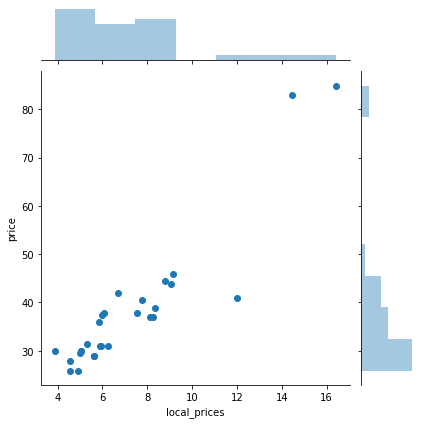

In [46]:
# para dos variable continuas puedo usar jointplot
sns.jointplot(df['local_prices'], df['price'])

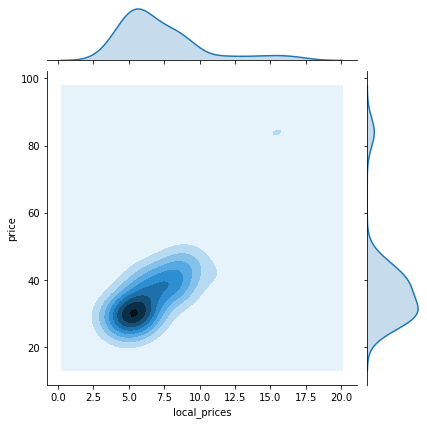

In [47]:
sns.jointplot(df['local_prices'], df['price'], kind='kde')

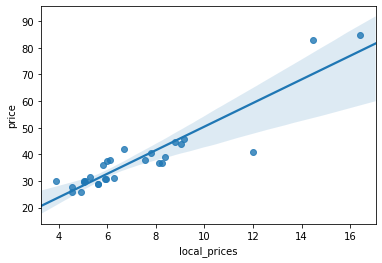

In [48]:
#pinta recta de regresion. Util para explorar visualmente los datos.
sns.regplot(df['local_prices'], df['price'])

### Histogram

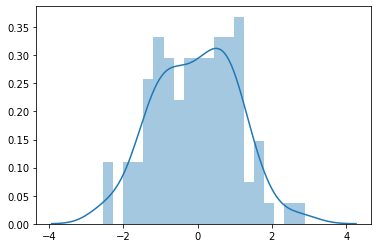

In [53]:
sns.distplot(np.random.randn(100), bins=20)
#displot te dibuja una curva que es una kernel density estimation

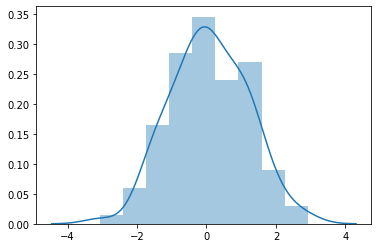

In [54]:
sns.distplot(np.random.randn(100))

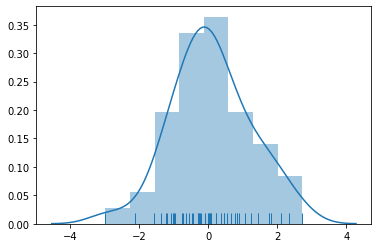

In [55]:
sns.distplot(np.random.randn(50), rug=True)
#cada marca de rug represneta un punto de entrada

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

In [56]:
df.columns

Index(['local_prices', 'bathrooms', 'site_area', 'living_area', 'garages',
       'rooms', 'bedrooms', 'age', 'construction_type', 'architecture',
       'fireplaces', 'price'],
      dtype='object')

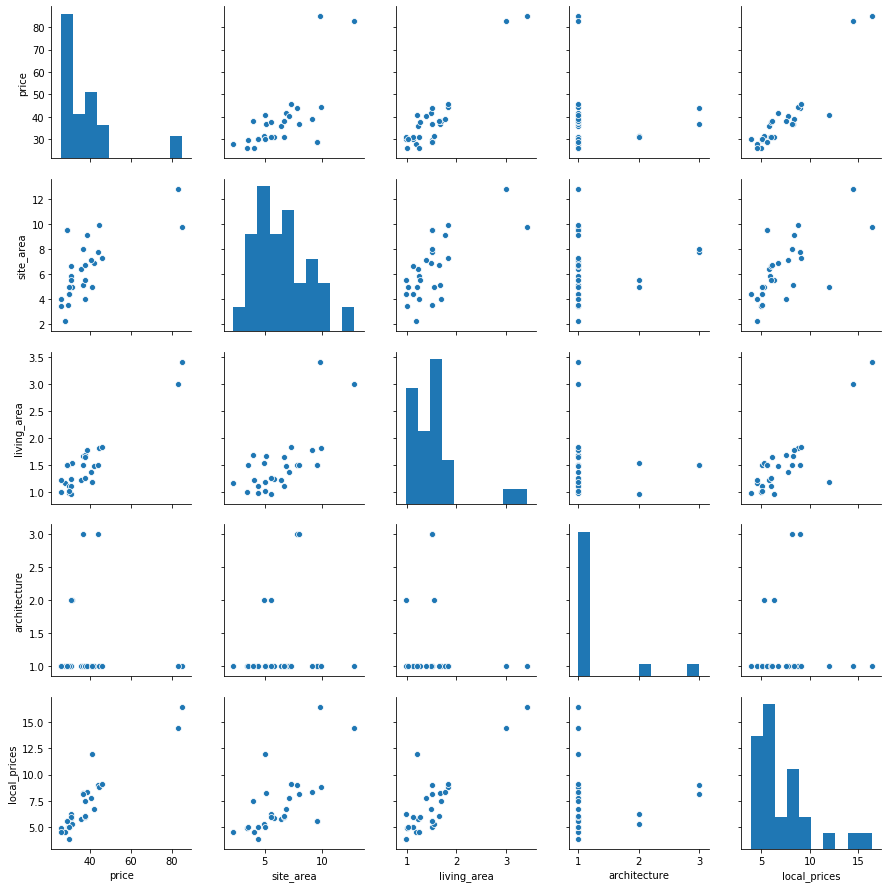

In [57]:
# Está muy bien para cuando recibimos un data frame por primera vez para explorarlo
# cogemos sólo 5 variables para que sea más legible y no queden los graficos muy pequeños en pantalla
# en la diagonal aparecen la distribución de cada variable en forma de barras
sns.pairplot(df[['price', 'site_area', 'living_area', 'architecture', 'local_prices']])

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

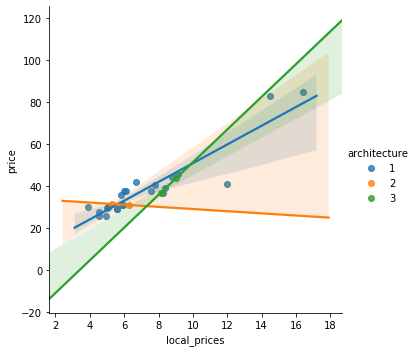

In [59]:
sns.lmplot(data=df, x='local_prices', y='price', hue='architecture')
#el argumento hue representa el tono. Usamos color sólo para variables categóricas.
#usamos hue para que use el color con una variable elegida

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

In [60]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Swarm plot

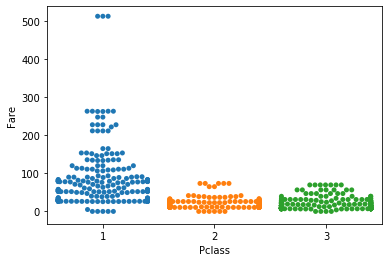

In [61]:
#qué relación hay entre la clase y el precio de billete
sns.swarmplot(data=titanic, x='Pclass', y='Fare')
#los puntos salen separaditos en horizontal para que no se solapen. no significa nada.

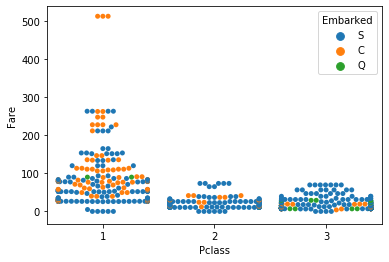

In [62]:
sns.swarmplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

### Boxplot

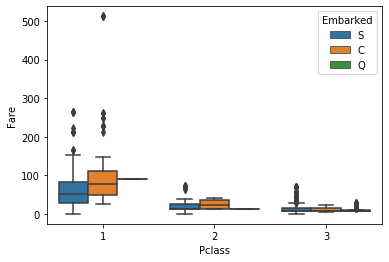

In [63]:
sns.boxplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')
#para comparar la media, mediana y eso de los embarket

(-20, 200)

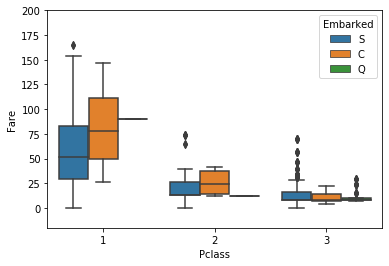

In [64]:
ax = sns.boxplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')
ax.set_ylim(-20, 200)

In [ ]:
ax.scatter(-20, 200)

(-20, 200)

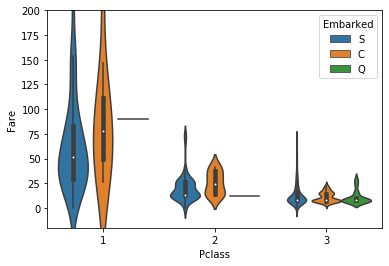

In [67]:
ax = sns.violinplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')
ax.set_ylim(-20, 200)
#el violinplot dibuja sobre el diagrama de cajas la curva de distribución, y luego su simétrica (para que no quede feo)

### Barplot / countplot

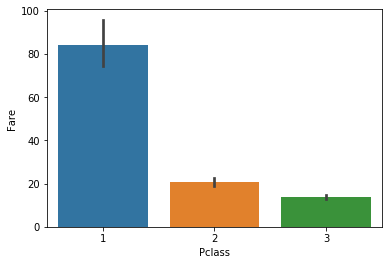

In [69]:
sns.barplot(data=titanic, x='Pclass', y='Fare')

### Pointplot

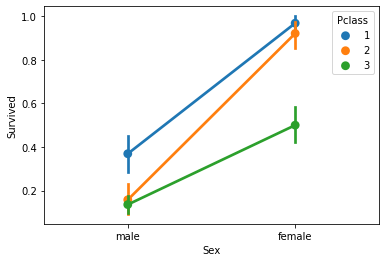

In [71]:
#le pasamos una variable categórica
sns.pointplot(data=titanic, x='Sex', hue='Pclass', y='Survived')

## Other types

### Heatmap

In [72]:
#colorea en base a una variable cuantitativa
#es muy bueno para visualizar correlaciones
#usaremos colormap divergente
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


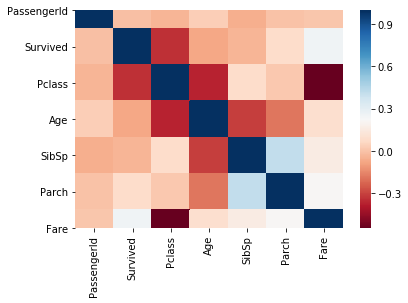

In [74]:
sns.heatmap(titanic.corr(), cmap='RdBu')

### Clustermap

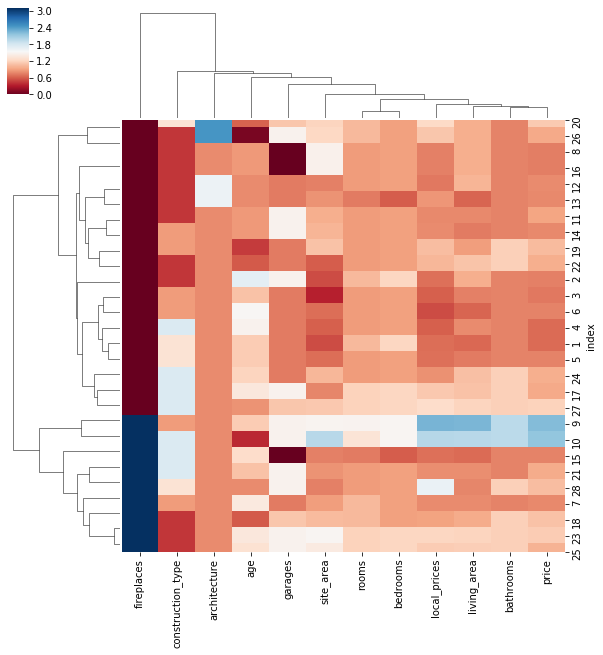

In [77]:
#es un heatmap que agrupa filas y columnas
sns.clustermap(df/df.mean(), cmap='RdBu')
#el arbol indica semejanza. cunado más cerca en el arbol de ramificación 
#estén dos filas/columnas más semejantes serán las variables o las casas
#si la rama es más larga indica menos semjanza

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 

Dash funciona con Plotly. Para hacer dashboards


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)